In [243]:
"""
This is a complete project/excercise from "Hands on Machine Learning with Scikit-Learn & TensorFlow" 
"""


#This function is used to create the dataframe from the csv file using the OS library 

import pandas as pd 
import os 

HOUSING_PATH = os.path.realpath('.')

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



In [244]:
#This "housing" variable calls the function from above and then we check the first 10 lines of the dataframe

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [245]:
#Prints out some information about the data like data type and total entries of each

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [246]:
#Prints out "ocean_proximity" this is the only object in our data that is an object
#Notice from the print out above the all other atributes are numerical data types

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [247]:
#This shows the a summary of the nummerical attributes

print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

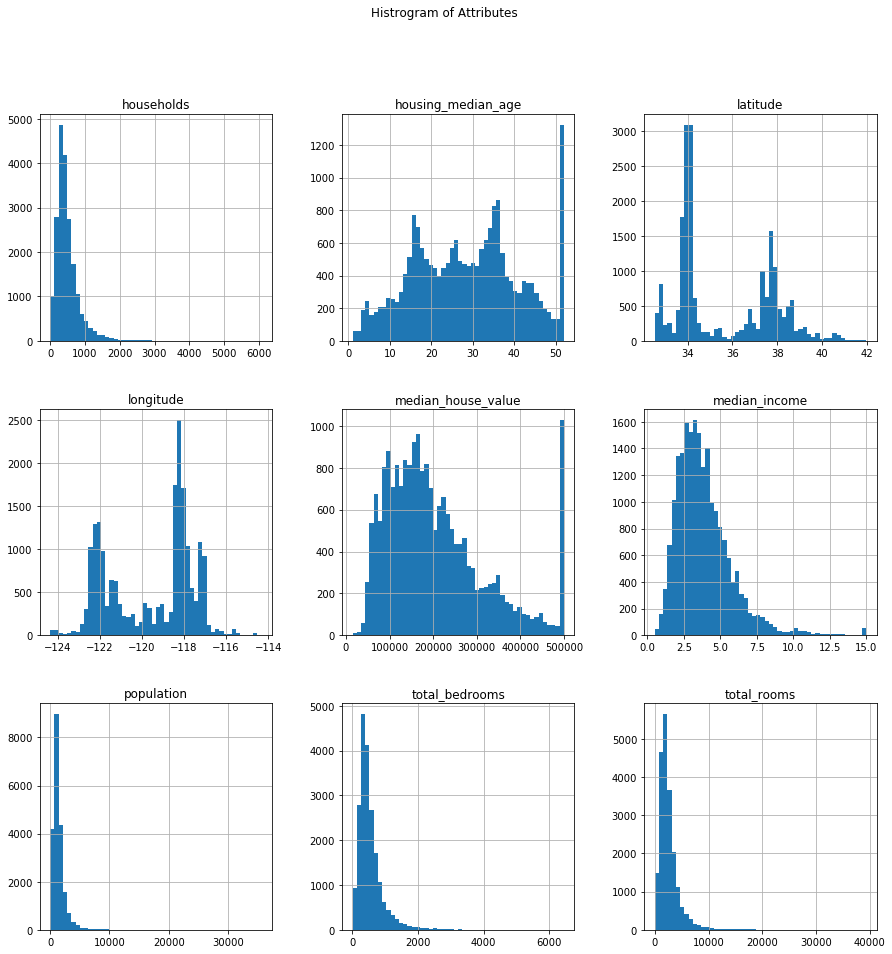

In [248]:
#Creates histrogram with label of attributes
#Modified the size of the histrogram to better fit my screen

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(15,15))
plt.suptitle("Histrogram of Attributes")
plt.show()

In [249]:
#This part of the code creates a test set from our data
#We are setting numpy's seed here in the begining to make sure our function 
#always sees the same part of the set

import numpy as np 
np.random.seed(42)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_set))

(16512, 4128)


In [250]:
#These functions imports the hashlib library to store the hash value of each instance's identifer
#The purpose of these functions is to limit the view of the machine learning algo. to just 20% of the set
#This is to prevent "data snooping bias"

import hashlib

def test_set_check(identifier, test_ratio, hash):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


#This part of the code makes the row index as the ID column since 
#the data set doesn't have a unique ID column
#The first line of code adds an "index" column

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [251]:
#This is a function that uses the Sckit-Learn library built in spliting function to take a 
#random sample size of the data 
#Pretty much redoing what we just did above but with fewer lines of code and some additional features
#Notice the function is that same name as the random sampling funciton we created earlier

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


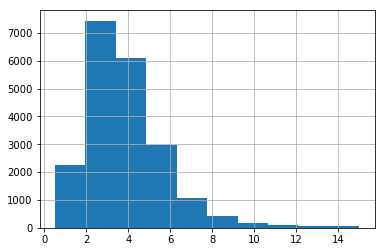

In [252]:
#This next set of code is used tp create a stratified sample from the data set
#The purpose of this to reduce error caused by large differences in the Standard Deviation


#So we start with getting a hist. with the median income attribute
#We are using income since for testing purposes only and we will return the data to the orignal state after this
housing["median_income"].hist()

In [253]:
#From here we notice that are too many income catagories and some of them are not significant so we divide the 
#median income by 1.5 to limit the catagories and use numpy's celi function to take the celling of each
#catagory and then mergining all catagories greater than 5 on into Cat. 5

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [254]:
#From here we can use Sklearn to perform a stratified sampling based on the income attribute

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
#Next we write a function that takes in the data and returns the calue counts of the income attribute and divides it 
#by the length of the total data set
#We then call train_test_split againi to get our sample set and finally call Pandas to print out a chart
#comparing stratified sampling vs random sampling

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100



In [255]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


In [256]:
#From the chart we can see that stratified sampling is closer to the overall category proportions
#After this we finally remove the "income_cat attribute so we can get back our original data

for set in (strat_train_set, strat_test_set):
    set.drop("income_cat", axis=1, inplace=True)

In [257]:
#The next series of code are going to plot various graphs/charts with the data set ot gain insights on the data
#First we make a copy of the training set in case something goes wrong 
#Then we make a scatter plot of the long. and lat. to get a visual from the data

housing = strat_train_set.copy()

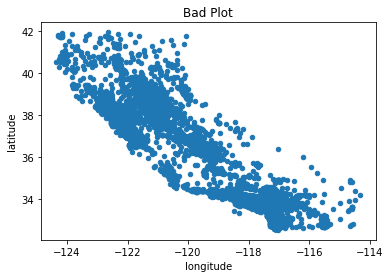

In [258]:
#This first plot is named bad plot becuase you can't see pop. densities with the color of the dots
housing.plot(kind="scatter", x="longitude", y="latitude", title="Bad Plot")

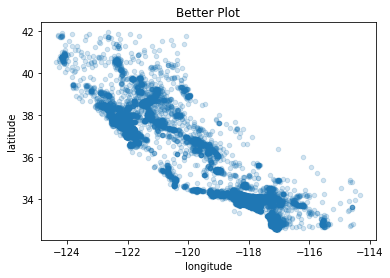

In [259]:
housing.plot(kind="scatter", x="longitude", y="latitude", title="Better Plot", alpha=0.2)

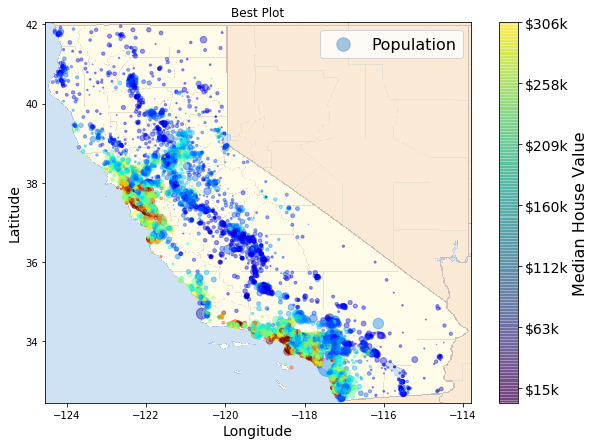

In [260]:
#As we can see with the plot there are more people living in certain areas like LA,SD ans SF but also in 
#Sacremento and Fresno areas
#Next we will plot the same thing but with varibles for a districts pop. which and the housing prices

import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                 )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.title("Best Plot")
plt.show()


In [261]:
#So the next we will do is to calculate the correlation
#Since the data set isn't too big we can do this right away
#We are goingt to try and get the correlation between each attribute and median house value


corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

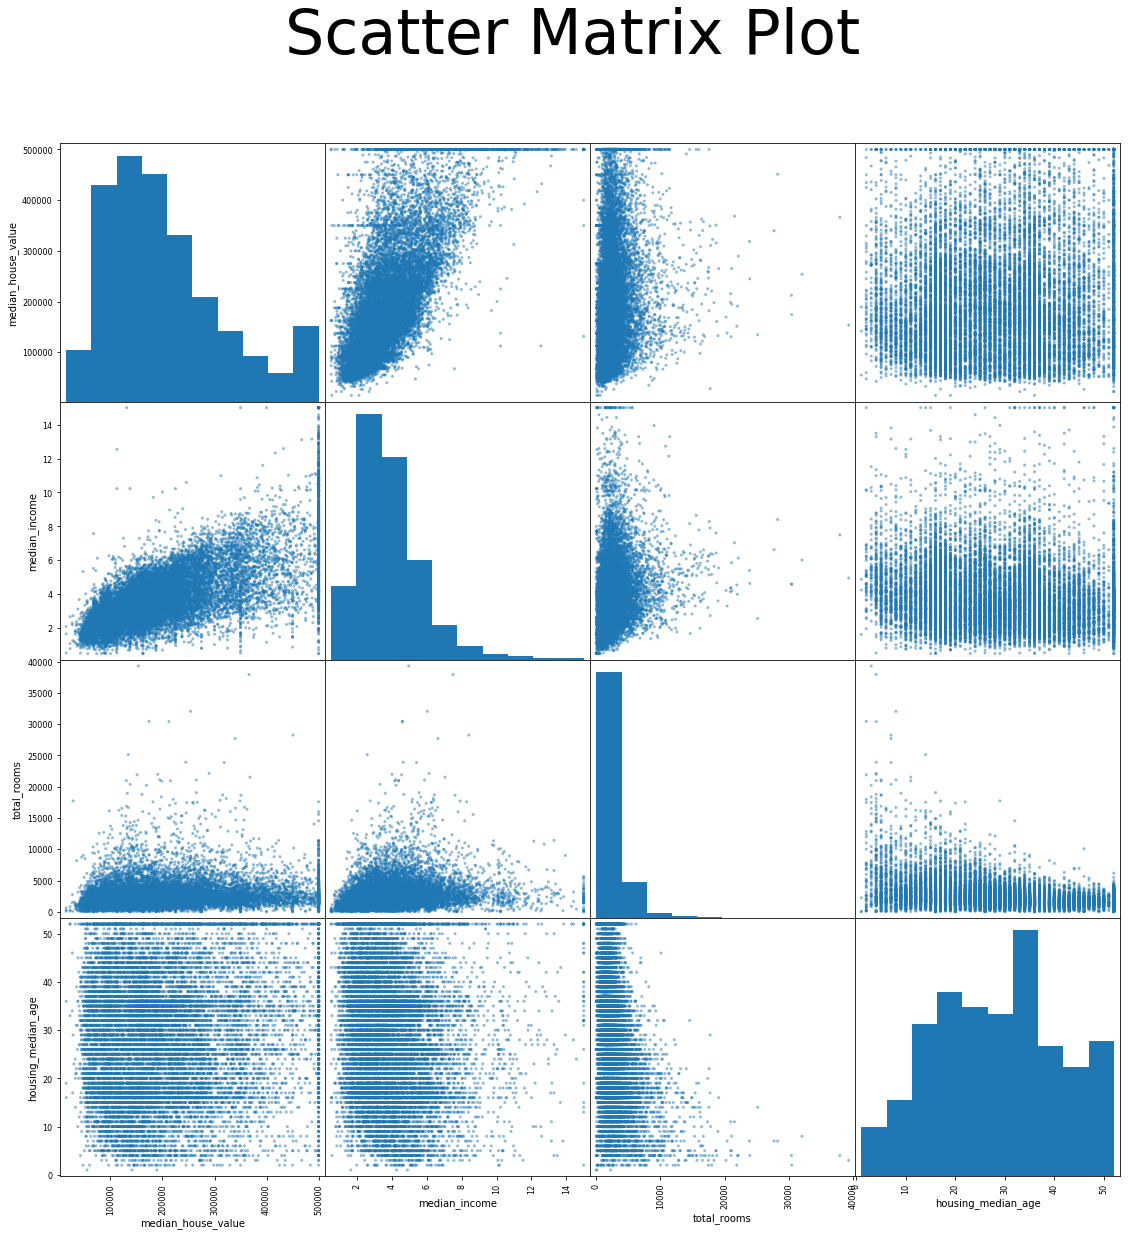

In [262]:
#So from the above cell we see that median_income has strong positive corr. with median_house_value
#There are also a couple of other attributes that have a close corr. so we can make a scatter plot of those attributes 
#Keep in mind that corr. we got earlier only works on Linear relationships 

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(19, 19))
plt.suptitle("Scatter Matrix Plot", fontsize=62)
plt.show()

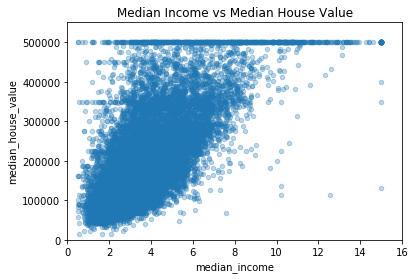

In [263]:
#As we see from the scatter ploots above the most promising attribute to predict the house value is 
#the median income
#So lets take a closer look at that attribute


housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3)
plt.axis([0, 16, 0, 550000])
plt.title("Median Income vs Median House Value")

In [264]:
#Before we start preping our data for the machine learning algorithm lets explore some ther interesting attrubutes
#Lets look at 3 attribute combinations
#Rooms per household, bedrroms per room and population per household

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

#After thi lets look at the corr. matrix again


corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

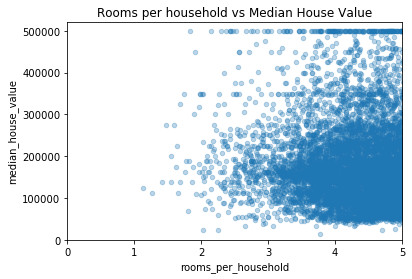

In [265]:
#As we can see rooms per household has a good positive corr. 
#So lets make a scatter plot of that vs median house value just see the relationship


housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.3)
plt.axis([0, 5, 0, 520000])
plt.title("Rooms per household vs Median House Value")
plt.show()

In [266]:
#As we can see this relation can be also used to predict housing prices
#Since the house prices rises linearly with the increasing number of rooms in a household

In [267]:
#The next thing we are going to do is prepare our data for the machine learning 
#algorithm 
#So we first have to do a few things before we can do is copy the training set and drop the lables 
#This is so we don't want to apply our transformations that we will be using to clean the data to the 
#labels of the data set
#We are also using the drop method in here that doesn't do a destructive copy of the data set

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [268]:
#The next step is to fill all the missing values in the training set since empty values will not work
#With the ML algorithm
#Lets first see what is missing

show_empty_rows = housing[housing.isnull().any(axis=1)].head()
show_empty_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [269]:
#So we what we are going to do is fill the empty attributes with the median of the 'total_bedrooms' att.
#We will use some functions that are built into Panda to make it quick and easy

median = housing["total_bedrooms"].median()
show_empty_rows["total_bedrooms"].fillna(median, inplace=True)
show_empty_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [270]:
#As we can see we replaced the empty nan values in totoal_bedrooms with the median of the att.
#Next we will use the "Imputer" class from Sklearn to inout the median into the rest ofthe empty values 
#Before we do this we need to remove the string attribute since median only work on numerical values
#We will make a copy of our date set with only numerical values first and then run "Imputer" to
#replace the empty values

from sklearn.preprocessing import Imputer

imputer_replace = Imputer(strategy='median')
housing_num = housing.drop("ocean_proximity", axis=1)
imputer_replace.fit(housing_num)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [271]:
#Now lets see if "Imputer" did it's job

imputer_replace.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [272]:
#It did does it's job so lets apply the values to all the nummerical att
#we are doing this because there might be missing values in new data when the system is live
#In this particluar data set though we only one att. that was empty but this step is just a precaution
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [273]:
#Now we can actually used this data set that has been filled with the data from "Imputer" to the actually 
#training data set
#When we do this it will just create a standard Numpy array so we will have to convert the array back to a 
#Pandas dataframe

Im_array = imputer_replace.transform(housing_num)

In [274]:
#This is our new Pandas dataframe with the data from Imputer

housing_trans = pd.DataFrame(Im_array, columns=housing_num.columns, index=list(housing.index.values))

In [275]:
#This is just to check the values of the empty rows that have been filled in by the transformation

housing_trans.loc[show_empty_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [276]:
housing_trans.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [277]:
#We see we don't have the matching first colums as the Original data set in the transfromed data set 
#So we will do a quick conversion again on the trans. set

housing_trans = pd.DataFrame(Im_array, columns=housing_num.columns)
housing_trans.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [278]:
#Next ting we will do is to convert the text based att. "ocean_proximity" to a numerical value
#We will use sklearn's LabelEncoder to do this

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [279]:
#We can see the classes that the encoder learned from the att. 

print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [280]:
#There is a problem with this though
#The problem is that ML algorithms will assume 2 nearby values are more similar than 2 distnt values
#To fix this issue the most common solution is to create "one-hot encoding"
#This is will assign 1 to lets one att. and 0 to all others when the cat. is that att. 
#Like 1 for INLAND and 0 for everything else
#Sklearn has a function for this
#Also we have to reshape the "housing_cat_encoded" because a 1-D array and "fit_transform" requires a 2-D array


from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_hot

<16512x5 sparse matrix of type '<type 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [281]:
#To store the array in a numpy array 
#This takes up more memory so depending on the situation a sparse matrix could be a better option

housing_cat_hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [282]:
#We can do the two transformations together in one shot with LabelBinarizer from Sklearn
#Instead of doing them seperatly
#It will default to a Numpy array but you can set as a sparse matrix if need be 

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_hot = encoder.fit_transform(housing_cat)
housing_cat_hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [283]:
"""
The follwing is a custom class that is used to add additional att. to the data set in this case 
they are 'rooms_per_household' and 'population_per_household'.
The purpose of writing this custom class is because a lot of times in the real world you will need to create 
your own tasks to perform a certain trans. or clean up procedures
We will be importing TransformerMixin for transfrom() and fit.transform() methods and BaseEstimator for 
get_params() and set_params() as additional methods
"""

from sklearn.base import TransformerMixin, BaseEstimator

#These are the Column indexes 
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdd(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, TR, y=None):
        return self #There is nothing else for fit to do 
    def transform(self, TR, y=None): #TR is every row in the given column
        rooms_per_household = TR[:, rooms_ix] / TR[:, household_ix]
        population_per_household = TR[:, population_ix] / TR[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = TR[:, bedrooms_ix] / TR[:, rooms_ix]
            return np.c_[TR, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[TR, rooms_per_household, population_per_household]

#add_bedrooms_per_room is a hyperparameter so this can be added to the ML algo. later if if helps it predict a 
#more acurate price 
attrib_adder = CombinedAttributesAdd(add_bedrooms_per_room=False)
housing_extra_attribs = attrib_adder.transform(housing.values)

In [284]:
#Lets add these extram att.and see the first 10 rows

housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+
                                     ["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [285]:
#The next couple of cells will be tranformation pipelines that will be used 
#to transform the data 
#we are using a class from Sklearn to do this
#The first pipeline will be for the numerical values of the data set 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numer_pipe = Pipeline([('imputer', Imputer(strategy="median")), ('attribs_adder', CombinedAttributesAdd()),
                      ('std_scaler', StandardScaler())])

housing_num_transp = numer_pipe.fit_transform(housing_num)
housing_num_transp

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [286]:
#The next step is to write a pipeline for transofrmation for the catagorial values 
#The problem is Sklearn doesn't have native support for Dataframes yet so we have to write a 
#class to do it instead of calling Sklearn like we did for the numerical values
#This class will be able to select either Numerical or Categorial values 

from sklearn.base import BaseEstimator, TransformerMixin

class DFrameSelect(BaseEstimator, TransformerMixin):
    def __init__(self, attrib_names):
        self.attrib_names = attrib_names
    def fit(self, trans_row, y=None):
        return self
    def transform(self, trans_row):
        return trans_row[self.attrib_names].values
    
#From here we can start creating the full pipeline for the transformation 

numer_attribs = list(housing_num)
catag_attribs = ["ocean_proximity"]

numer_pipe = Pipeline([('selector', DFrameSelect(numer_attribs)),('imputer', Imputer(strategy="median")),
                       ('attribs_adder', CombinedAttributesAdd()), ('std_scaler', StandardScaler())])

catag_pipe = Pipeline([('selector', DFrameSelect(catag_attribs)), ('label_binarizer', LabelBinarizer())])

In [287]:
#So we have a pipeline for both types of values but we can now import SKlearn's "FeatureUnion"class
#To run both pipelines and then concatenates both of the outputs together as one set 

from sklearn.pipeline import FeatureUnion

full_pipe = FeatureUnion(transformer_list=[("numer_pipe", numer_pipe),("catag_pipe", catag_pipe)])

#From here we can create our varibale with the fully transformed data from the pipeline

prep_housing = full_pipe.fit_transform(housing)
prep_housing

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [288]:
#Now we can start to feed our data into our ML algorithm

